In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import pickle
import sys 

sys.path.append('../util/')

import WheelerKaladis_util as wk

%load_ext autoreload
%autoreload 2

In [2]:
# Load the dictionary from the file
vn = 'olr'
lat_lim = 20
mjo_ind = 'RMM' 
leadmjo = 15

# mjo_ind = 'ROMI' 
# leadmjo = 25

m=1
mflg = 'off' 
wnx = 1
wnxflg = 'off'
zmode = 1
nmem = 1
dataflg = '' 
flag = vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+dataflg

with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfields'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'rb') as file2:
    outfields = pickle.load(file2)



In [26]:
np.asarray(outfields['input_layer']).shape

(127, 20, 64, 21, 180)

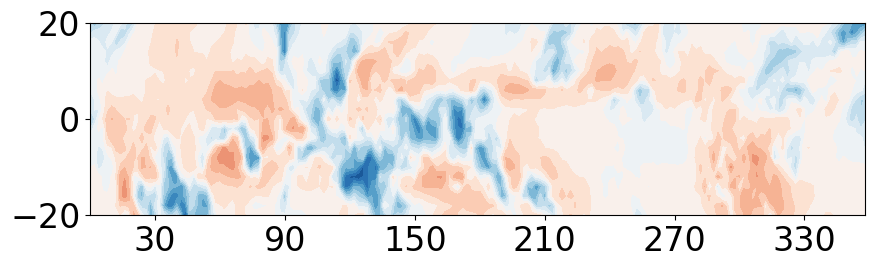

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,2.5))
plt.rcParams.update({'font.size': 24})
# apply relu to the input layer
data = np.squeeze(np.asarray(outfields['input_map'])[0,0,0,:,:])
# data_relu = np.maximum(data, 0)
im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data, cmap='RdBu_r', levels=np.linspace(-5,5,21))
ax.set_xticks(np.arange(30,360,60))
# plt.colorbar(im, ax=ax)

In [5]:
# Load the dictionary from the file
vn = 'olr'
lat_lim = 20
mjo_ind = 'RMM' 
leadmjo = 15

# mjo_ind = 'ROMI' 
# leadmjo = 25

m=10
mflg = 'all' 
wnx = 1
wnxflg = 'off'
zmode = 1
nmem = 1
dataflg = '' 
flag = vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+dataflg

with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfields'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'rb') as file2:
    outfields = pickle.load(file2)



FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfieldsolr20deg_RMM_ERA5_lead15_dailyinput_m10all_wnx1off_zmode1_nmem1.pickle'

In [ ]:
# plot all channels in the first hidden layer
fig, axs = plt.subplots(16,4,figsize=(20,20))

for i, ax in enumerate(axs.flatten()):
    data = np.squeeze(np.asarray(outfields['hidden5'])[0,0,i+64,:,:])
    data_relu = np.maximum(data, 0)
    im = ax.contourf(np.arange(180), np.arange(20,-22,-2), data_relu)
    plt.colorbar(im, ax=ax)

In [10]:
# For each layer in the outfiels
# the shape of the input_map is (time, batch, channel, lat, lon)
# reshape the fields to (time*batch, channel, lat, lon)
# for each time step, perform forier transform for each time step across longitudes
# average over all time steps and latitudes

outfields_fft = {}

for layer_name in outfields.keys():
    time, batch, channel, lat, lon = np.shape(outfields[layer_name])
    feature_maps = np.reshape(outfields[layer_name], (time*batch, channel, lat, lon))

    # apply ReLu
    feature_maps = np.maximum(feature_maps, 0)

    feature_maps_fft = np.fft.fft(feature_maps, axis=-1)
    feature_maps_fft_power = np.mean(np.abs(feature_maps_fft)**2, axis=(0,2))  # average over time and latitudes (channel, wavenumber)
    feature_maps_fft_power_norm = feature_maps_fft_power / np.sum(feature_maps_fft_power, axis=-1, keepdims=True)

    outfields_fft[layer_name] = feature_maps_fft_power_norm



: 

In [2]:
# Load the dictionary from the file
vn = 'olr'
lat_lim = 20
mjo_ind = 'RMM' 
leadmjo = 15

# mjo_ind = 'ROMI' 
# leadmjo = 25

m=1
mflg = 'off' 
wnx = 1
wnxflg = 'off'
zmode = 1
nmem = 1
dataflg = '' 
flag = vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+dataflg

with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfields_fft_only_'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'rb') as file2:
    outfields_fft = pickle.load(file2)



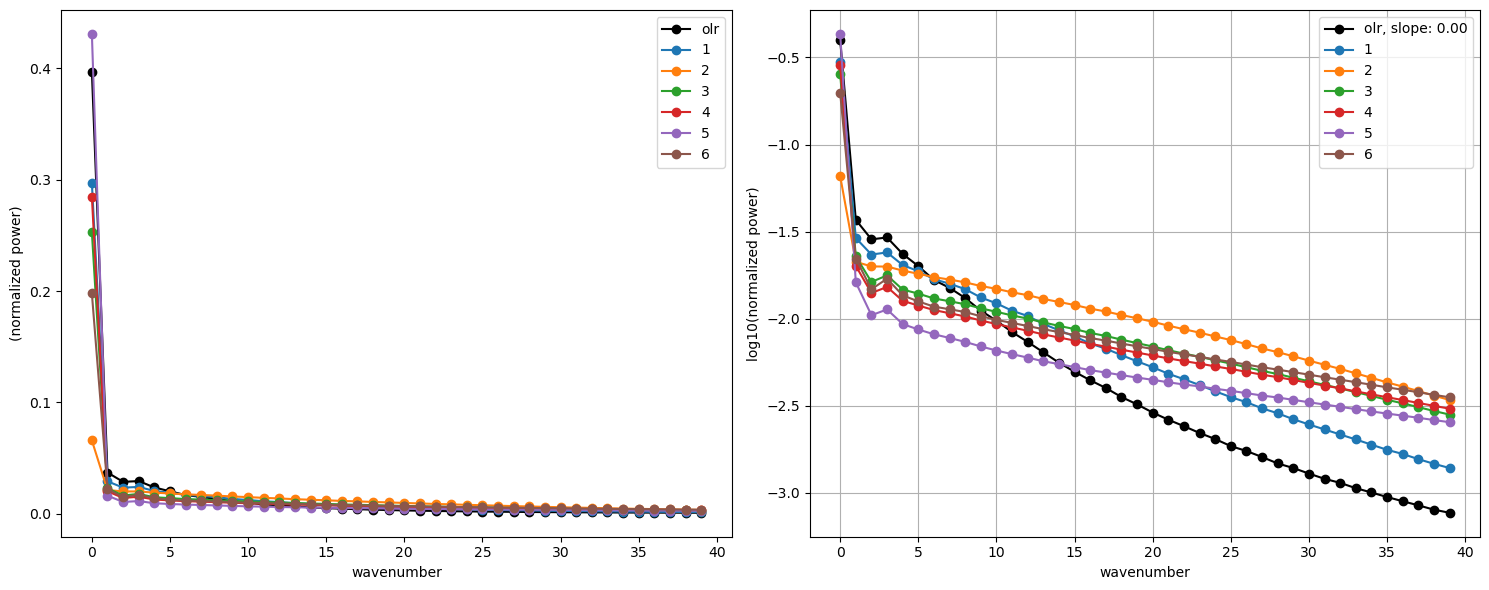

In [15]:
# get the wavenumber for the fourier transform
lon = 180
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 40
# plot the power spectrum
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

layer_names = list(outfields_fft.keys())
ax[0].plot(wavenumber[0:kmax], np.squeeze(outfields_fft['input_map'][:,:kmax]), 'ko-', label='olr')

for i in range(6):
    ax[0].plot(wavenumber[0:kmax], np.mean(outfields_fft[layer_names[i+1]][:, :kmax], axis=0).T, 'o-', label=str(i+1))
    
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('(normalized power)')
ax[0].legend()
slope0=0
# slope0, intercept = np.polyfit(wavenumber[10:kmax], np.log10(outfields_fft['input_map'][0, 10:kmax]), 1)
ax[1].plot(wavenumber[0:kmax], np.log10(np.squeeze(outfields_fft['input_map'][:, :kmax])), 'ko-', label='olr, slope: {:.2f}'.format(slope0))
slope = 0
for i in range(6):
    # slope, intercept = np.polyfit(wavenumber[10:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, 10:kmax], axis=0)), 1)
    ax[1].plot(wavenumber[0:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, :kmax], axis=0)).T, 'o-', label=str(i+1))
    
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('log10(normalized power)')
ax[1].legend()

plt.grid(visible=True)
plt.tight_layout()

In [3]:
# For each layer in the outfiels
# the shape of the input_map is (time, batch, channel, lat, lon)
# reshape the fields to (time*batch, channel, lat, lon)
# for each time step, averaged over latitudes
# do forier transform for each time step across longitudes
# average over all time steps

outfields_fft = {}

for layer_name in outfields.keys():
    time, batch, channel, lat, lon = np.shape(outfields[layer_name])
    feature_maps = np.reshape(np.mean(outfields[layer_name], axis=-2), (time*batch, channel, lon)) # average over latitudes
    feature_maps_fft = np.fft.fft(feature_maps, axis=-1)
    feature_maps_fft_power = np.mean(np.abs(feature_maps_fft)**2, axis=0)
    feature_maps_fft_power_norm = feature_maps_fft_power / np.sum(feature_maps_fft_power, axis=-1, keepdims=True)

    outfields_fft[layer_name] = feature_maps_fft_power_norm



Plot the power spectrum for each hidden layer in the model.

In [4]:
outfields.keys()

dict_keys(['input_map', 'input_layer', 'hidden1', 'hidden2', 'hidden3', 'hidden4', 'hidden5'])

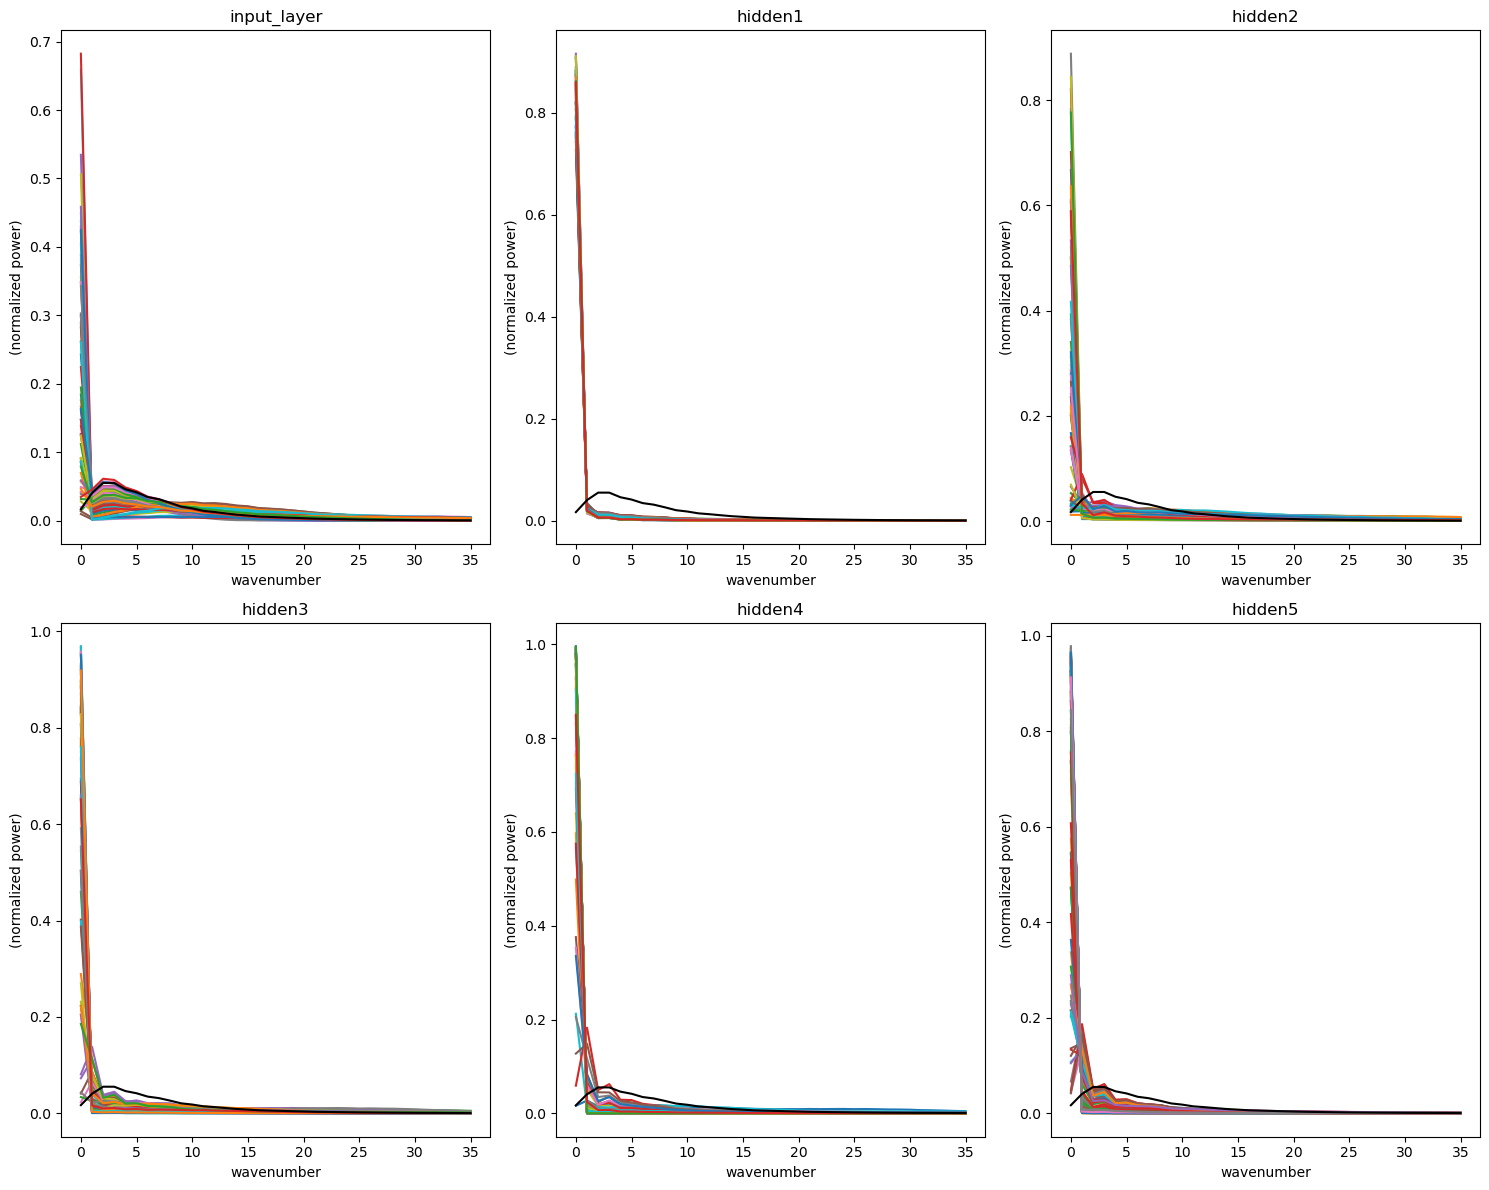

In [13]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 36
# plot the power spectrum
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

layer_names = list(outfields_fft.keys())

for i, ax in enumerate(axs.flatten()):
    ax.plot(wavenumber[0:kmax], (outfields_fft[layer_names[i+1]][:, :kmax]).T)
    ax.plot(wavenumber[0:kmax], (outfields_fft['input_map'][0, :kmax]), 'k-')
    ax.set_title(layer_names[i+1])
    ax.set_xlabel('wavenumber')
    ax.set_ylabel('(normalized power)')

plt.tight_layout()

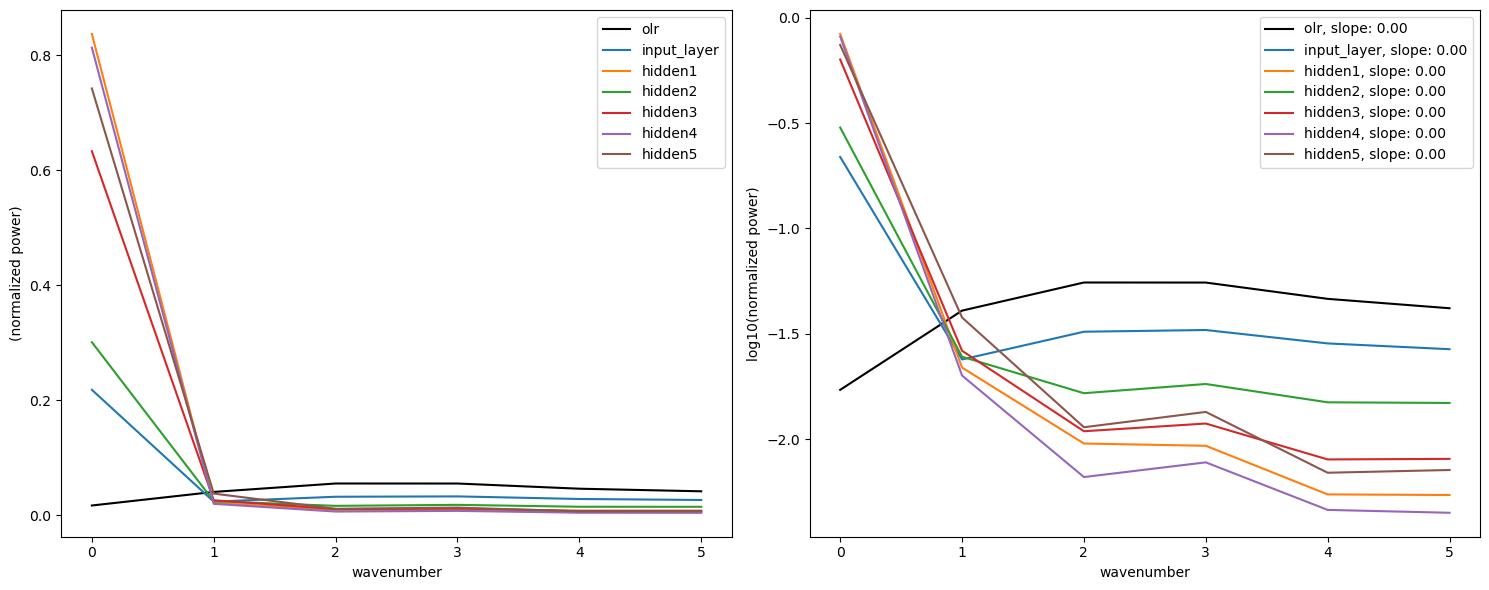

In [19]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 6
# plot the power spectrum
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

layer_names = list(outfields_fft.keys())
ax[0].plot(wavenumber[0:kmax], (outfields_fft['input_map'][0, :kmax]), 'k-', label='olr')

for i in range(6):
    ax[0].plot(wavenumber[0:kmax], np.mean(outfields_fft[layer_names[i+1]][:, :kmax], axis=0).T, label=layer_names[i+1])
    
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('(normalized power)')
ax[0].legend()
slope0=0
# slope0, intercept = np.polyfit(wavenumber[10:kmax], np.log10(outfields_fft['input_map'][0, 10:kmax]), 1)
ax[1].plot(wavenumber[0:kmax], np.log10(outfields_fft['input_map'][0, :kmax]), 'k-', label='olr, slope: {:.2f}'.format(slope0))
slope = 0
for i in range(6):
    # slope, intercept = np.polyfit(wavenumber[10:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, 10:kmax], axis=0)), 1)
    ax[1].plot(wavenumber[0:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, :kmax], axis=0)).T, label=layer_names[i+1]+', slope: {:.2f}'.format(slope))
    
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('log10(normalized power)')
ax[1].legend()

plt.tight_layout()

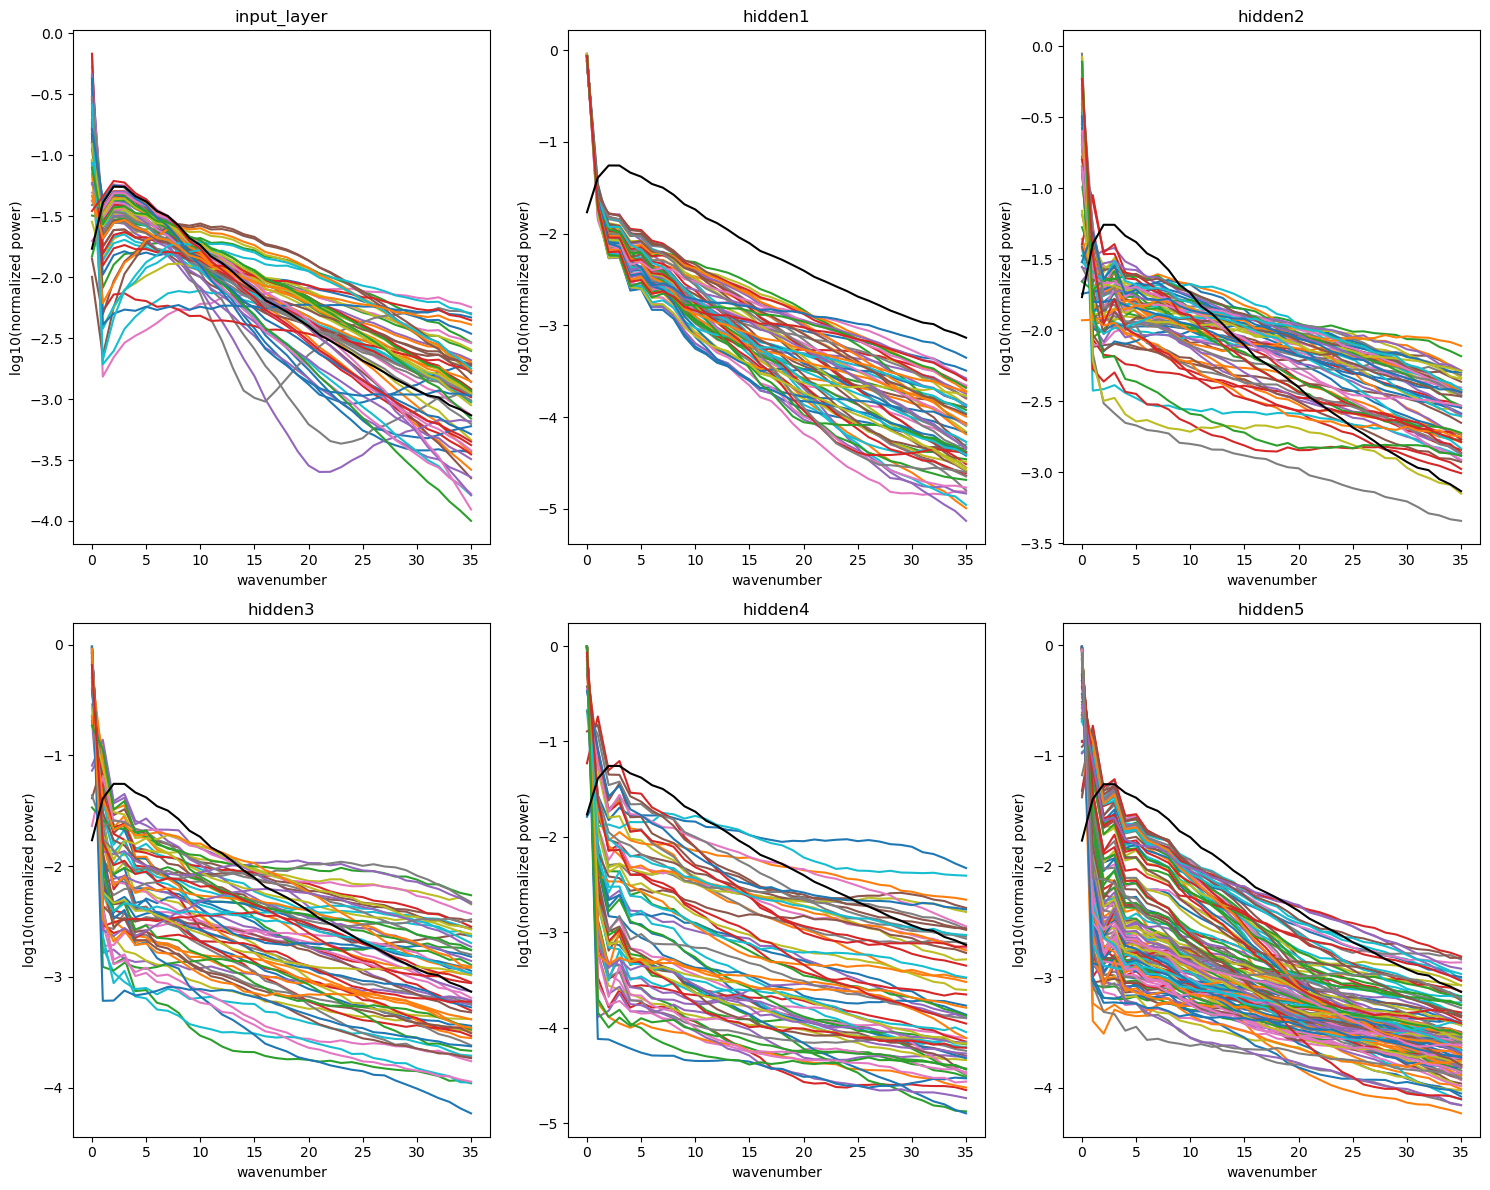

In [5]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 36
# plot the power spectrum
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

layer_names = list(outfields_fft.keys())

for i, ax in enumerate(axs.flatten()):
    ax.plot(wavenumber[0:kmax], np.log10(outfields_fft[layer_names[i+1]][:, :kmax]).T)
    ax.plot(wavenumber[0:kmax], np.log10(outfields_fft['input_map'][0, :kmax]), 'k-')
    ax.set_title(layer_names[i+1])
    ax.set_xlabel('wavenumber')
    ax.set_ylabel('log10(normalized power)')

plt.tight_layout()

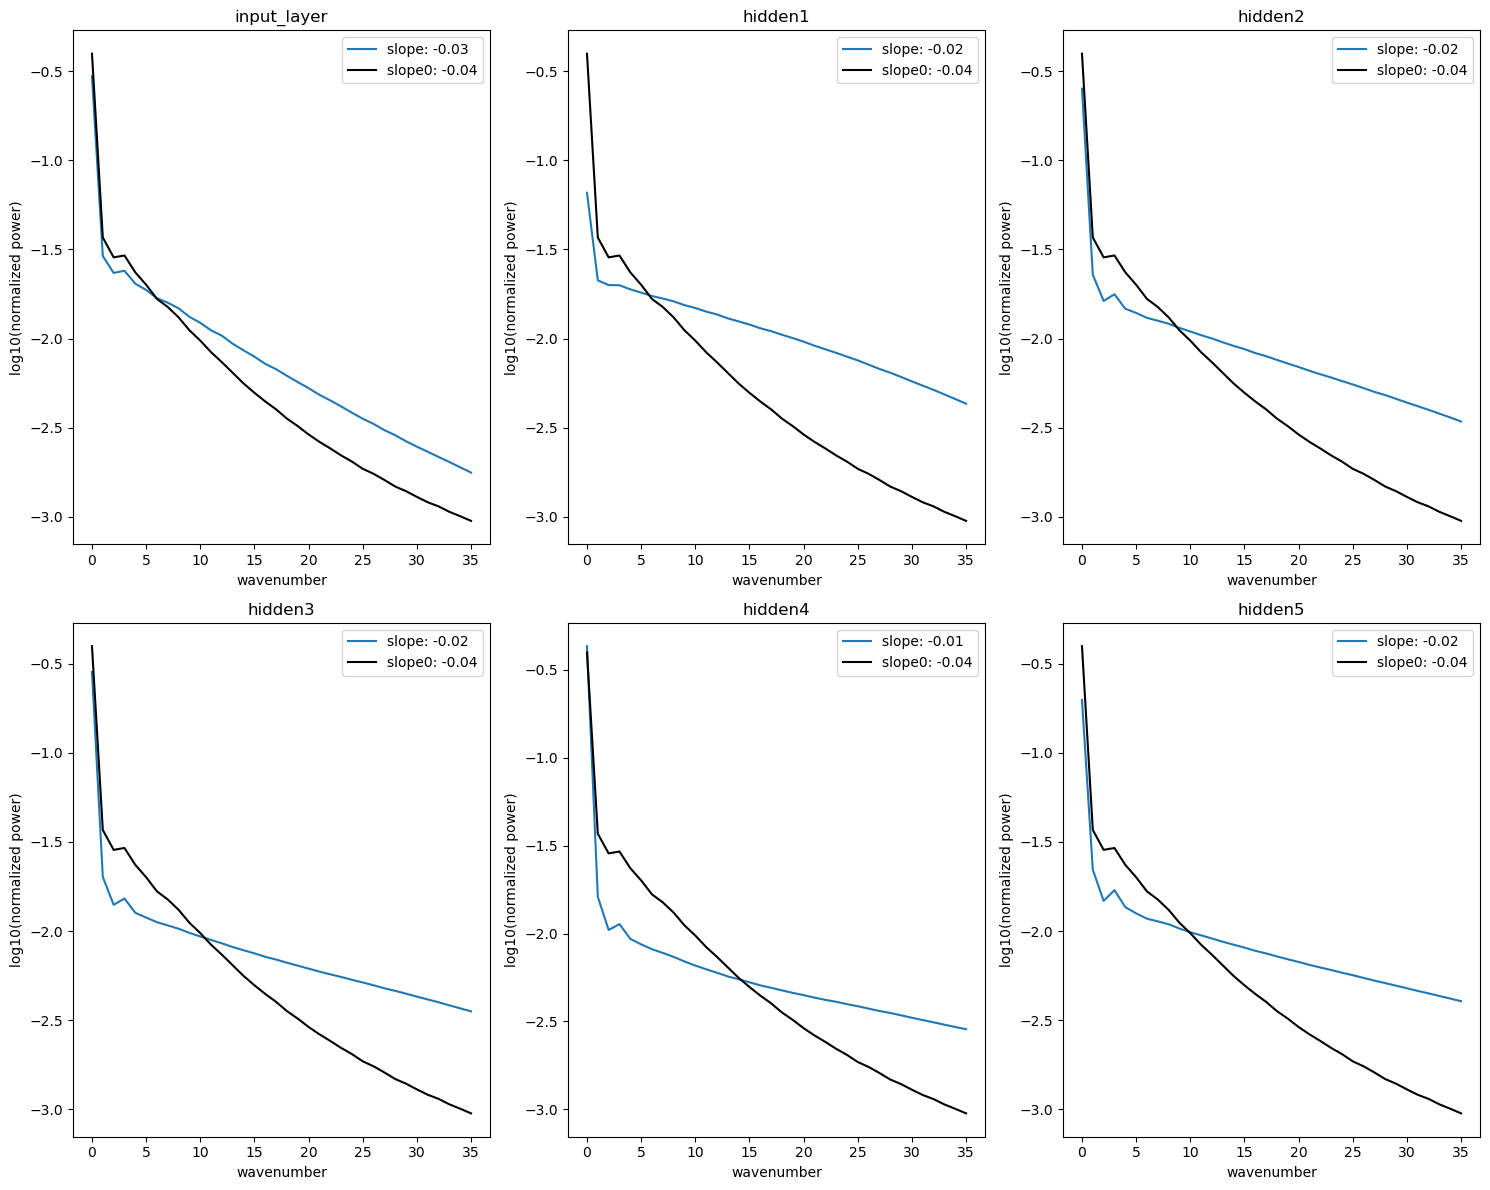

In [13]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 36
# plot the power spectrum
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

layer_names = list(outfields_fft.keys())
slope0, intercept = np.polyfit(wavenumber[10:kmax], np.log10(outfields_fft['input_map'][0, 10:kmax]), 1)

for i, ax in enumerate(axs.flatten()):
    slope, intercept = np.polyfit(wavenumber[10:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, 10:kmax], axis=0)), 1)

    ax.plot(wavenumber[0:kmax], np.log10(np.mean(outfields_fft[layer_names[i+1]][:, :kmax], axis=0)).T, label='slope: {:.2f}'.format(slope))
    ax.plot(wavenumber[0:kmax], np.log10(outfields_fft['input_map'][0, :kmax]), 'k-', label='slope0: {:.2f}'.format(slope0))
    ax.legend()
    ax.set_title(layer_names[i+1])
    ax.set_xlabel('wavenumber')
    ax.set_ylabel('log10(normalized power)')

plt.tight_layout()

Look into input_layer

0.003966763204537479


Text(0.5, 1.0, 'Small scale')

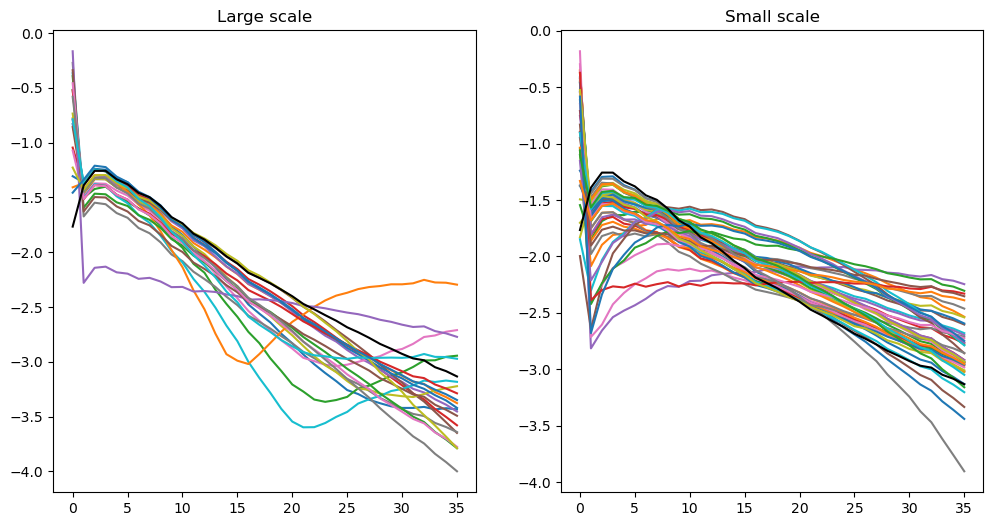

In [14]:
input_layer_fft = outfields_fft['input_layer']  # shape (channel, wavenumber)

small_scale = []
large_scale = []

k_thred = 20
thred = outfields_fft['input_map'][0, k_thred]
print(thred)
for channel in range(np.shape(input_layer_fft)[0]):
    if input_layer_fft[channel, k_thred] >= thred:
        small_scale.append(input_layer_fft[channel, :kmax])
    else:
        large_scale.append(input_layer_fft[channel, :kmax])

# plot the spectrum 
small_scale = np.array(small_scale)
large_scale = np.array(large_scale)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(wavenumber[0:kmax], np.log10(large_scale).T)
axs[0].plot(wavenumber[0:kmax], np.log10(outfields_fft['input_map'][0, :kmax]), 'k-')
axs[0].set_title('Large scale')

axs[1].plot(wavenumber[0:kmax], np.log10(small_scale).T)
axs[1].plot(wavenumber[0:kmax], np.log10(outfields_fft['input_map'][0, :kmax]), 'k-')
axs[1].set_title('Small scale')

In [3]:
# choose three layers in the outfiels: input_map, hidden1, and hidden5
# the shape of the input_map is (time, batch, channel, lat, lon)
# reshape the fields to (time*batch, channel, lat, lon)
# for each time step, averaged over latitudes
# do forier transform for each time step across longitudes
# average over all time steps

time, batch, channel, lat, lon = np.shape(outfields['input_map'])
input_map = np.reshape(np.mean(outfields['input_map'], axis=-2), (time*batch, -1, lon))
hidden1 = np.reshape(np.mean(outfields['hidden1'], axis=-2), (time*batch, -1, lon))
hidden5 = np.reshape(np.mean(outfields['hidden5'], axis=-2), (time*batch, -1, lon))

input_map_fft = np.fft.fft(input_map, axis=-1)
hidden1_fft = np.fft.fft(hidden1, axis=-1)
hidden5_fft = np.fft.fft(hidden5, axis=-1)

input_map_fft_mean = np.mean(np.abs(input_map_fft), axis=0)
hidden1_fft_mean = np.mean(np.abs(hidden1_fft), axis=0)
hidden5_fft_mean = np.mean(np.abs(hidden5_fft), axis=0)

# get the power of the mean fourier transform
input_map_fft_power = input_map_fft_mean**2
hidden1_fft_power = hidden1_fft_mean**2
hidden5_fft_power = hidden5_fft_mean**2

# normalize the power
input_map_fft_power_norm = input_map_fft_power/np.sum(input_map_fft_power, axis=-1, keepdims=True)
hidden1_fft_power_norm = hidden1_fft_power/np.sum(hidden1_fft_power, axis=-1, keepdims=True)
hidden5_fft_power_norm = hidden5_fft_power/np.sum(hidden5_fft_power, axis=-1, keepdims=True)


In [4]:
hidden1_fft_power_norm.shape

(64, 180)

Text(0, 0.5, 'power')

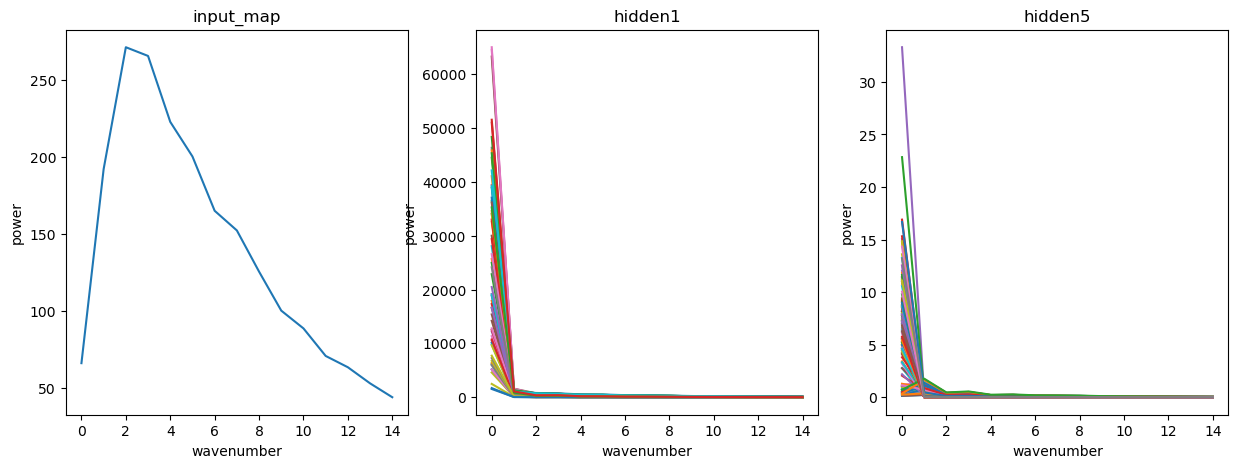

In [5]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 15
# plot the power spectrum
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavenumber[0:kmax], input_map_fft_power[0, :kmax])
ax[0].set_title('input_map')
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('power')

# ax[1].plot(wavenumber[0:kmax], input_map_fft_power[0, :kmax], 'k-')
ax[1].plot(wavenumber[0:kmax], hidden1_fft_power[:, :kmax].T)
ax[1].set_title('hidden1')
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('power')

# ax[2].plot(wavenumber[0:kmax], input_map_fft_power[0, :kmax], 'k-')
ax[2].plot(wavenumber[0:kmax], hidden5_fft_power[:, :kmax].T)
ax[2].set_title('hidden5')
ax[2].set_xlabel('wavenumber')
ax[2].set_ylabel('power')



Text(0, 0.5, 'log10(power)')

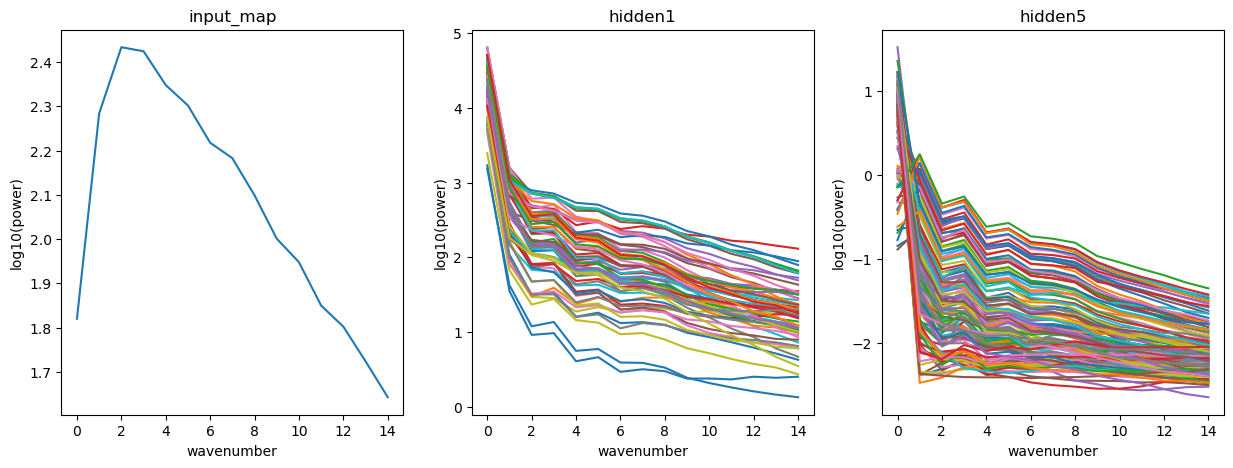

In [6]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 15
# plot the power spectrum
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavenumber[0:kmax], np.log10(input_map_fft_power[0, :kmax]))
ax[0].set_title('input_map')
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('log10(power)')

# ax[1].plot(wavenumber[0:kmax], input_map_fft_power[0, :kmax], 'k-')
ax[1].plot(wavenumber[0:kmax], np.log10(hidden1_fft_power[:, :kmax].T))
ax[1].set_title('hidden1')
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('log10(power)')

# ax[2].plot(wavenumber[0:kmax], input_map_fft_power[0, :kmax], 'k-')
ax[2].plot(wavenumber[0:kmax], np.log10(hidden5_fft_power[:, :kmax].T))
ax[2].set_title('hidden5')
ax[2].set_xlabel('wavenumber')
ax[2].set_ylabel('log10(power)')

Text(0, 0.5, 'normalized power')

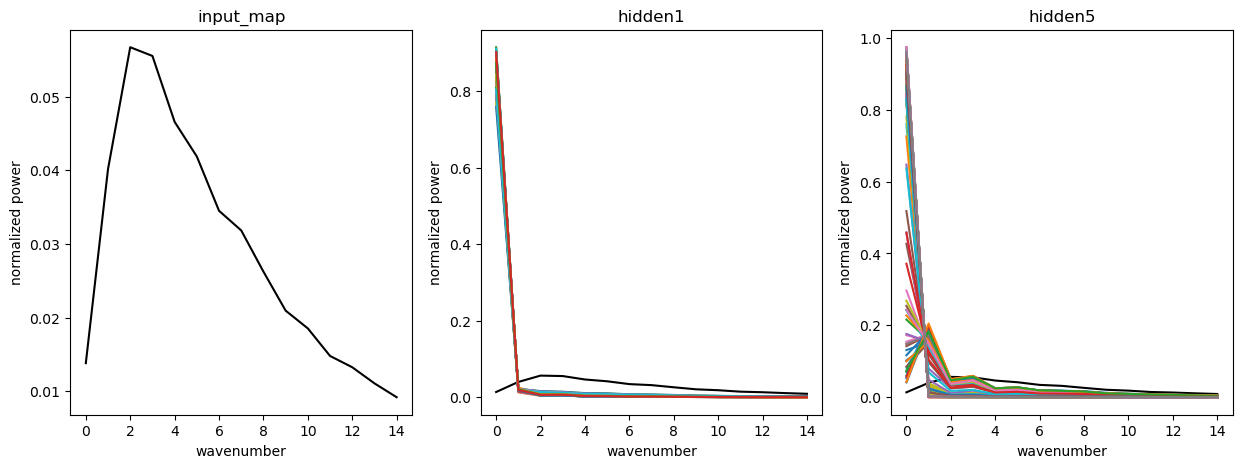

In [7]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 15
# plot the power spectrum
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavenumber[0:kmax], input_map_fft_power_norm[0, :kmax], 'k-')
ax[0].set_title('input_map')
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('normalized power')

ax[1].plot(wavenumber[0:kmax], input_map_fft_power_norm[0, :kmax], 'k-')
ax[1].plot(wavenumber[0:kmax], hidden1_fft_power_norm[:, :kmax].T)
ax[1].set_title('hidden1')
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('normalized power')

ax[2].plot(wavenumber[0:kmax], input_map_fft_power_norm[0, :kmax], 'k-')
ax[2].plot(wavenumber[0:kmax], hidden5_fft_power_norm[:, :kmax].T)
ax[2].set_title('hidden5')
ax[2].set_xlabel('wavenumber')
ax[2].set_ylabel('normalized power')



Text(0, 0.5, 'log10(normalized power)')

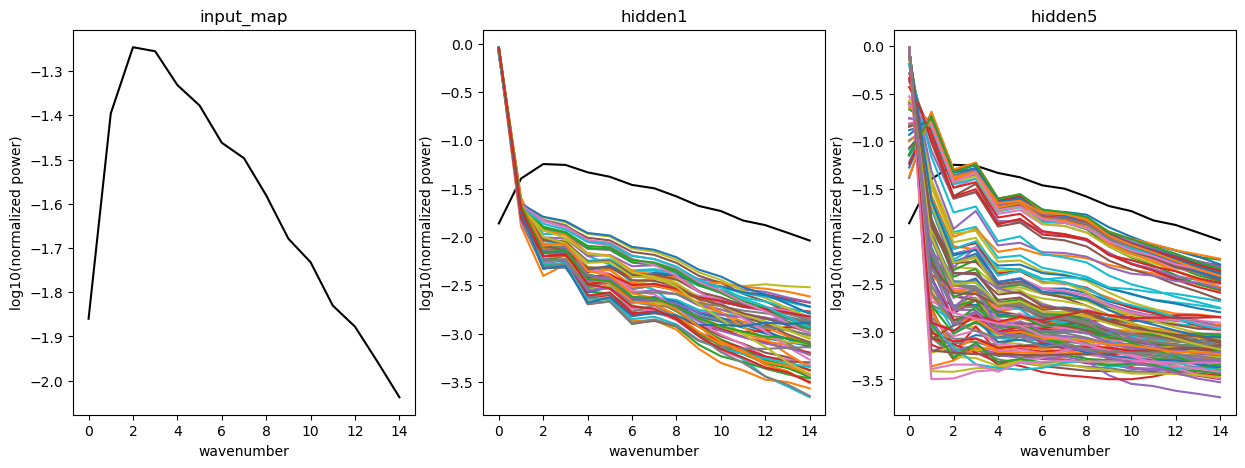

In [8]:
# get the wavenumber for the fourier transform
wavenumber = np.fft.fftfreq(lon, d=1) * lon 

kmax = 15
# plot the power spectrum
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(wavenumber[0:kmax], np.log10(input_map_fft_power_norm[0, :kmax]), 'k-')
ax[0].set_title('input_map')
ax[0].set_xlabel('wavenumber')
ax[0].set_ylabel('log10(normalized power)')

ax[1].plot(wavenumber[0:kmax], np.log10(input_map_fft_power_norm[0, :kmax]), 'k-')
ax[1].plot(wavenumber[0:kmax], np.log10(hidden1_fft_power_norm[:, :kmax]).T)
ax[1].set_title('hidden1')
ax[1].set_xlabel('wavenumber')
ax[1].set_ylabel('log10(normalized power)')

ax[2].plot(wavenumber[0:kmax], np.log10(input_map_fft_power_norm[0, :kmax]), 'k-')
ax[2].plot(wavenumber[0:kmax], np.log10(hidden5_fft_power_norm[:, :kmax]).T)
ax[2].set_title('hidden5')
ax[2].set_xlabel('wavenumber')
ax[2].set_ylabel('log10(normalized power)')

